<font size = 6> Линейная регрессия

Выполнил:
Шутов Захар Андреевич
ММБ-002

Цель работы — предсказание стоимости коттеджа по его площади и другим
характеристик с помощью линейной модели регрессионного анализа.

<font size = 4> Описание переменных

PRICE — стоимость коттеджа в тысячах долларов США.

HOUSE — площадь коттеджа в квадратных метрах.

AREA — площадь участка в сотках.

DIST — расстояние от расположения коттеджа до кольцевой автомобильной дороги в
километрах.

ECO — индикатор, принимающий значение 1, если рядом с коттеджем есть река или
озеро, и значение 0 в противном случае.

# Введение

Импортируем нужные нам библиотеки

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math
import scipy

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score, explained_variance_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

Загрузим данные

In [24]:
df = pd.read_excel("ML.ds3.xlsx", "V(19)", header=1)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Выведем часть данных

In [25]:
df.head()

,Price,House,Area,Dist,Eco
0,27.0,130,6.0,12.0,0
1,270.0,350,15.0,15.0,1
2,6.0,36,6.0,65.0,0
3,120.0,300,32.0,28.0,1
4,135.0,170,15.0,30.0,1


# Подготовка данных

Выделим отдельно целевую переменную и исходные признаки

In [26]:
X = df.drop(['Price'], axis=1)
Y = df['Price']

Разделим данные на обучающую (80%) и тестовую (20%) части

In [27]:
test_size = 0.20
r_state = 57
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=r_state)
X_test 

,House,Area,Dist,Eco
16,500,40.0,26.0,1
19,150,10.0,26.0,1
43,250,15.0,85.0,1
9,130,15.0,27.0,1
39,228,20.0,45.0,0
36,320,20.0,25.0,0
31,300,15.0,0.5,1
20,370,15.0,45.0,1
10,56,15.0,75.0,0
32,400,22.0,20.0,1


In [28]:
y_test

16    220.0
19    120.0
43     42.0
9     130.0
39     83.0
36     85.0
31    320.0
20     95.0
10     16.5
32    300.0
Name: Price, dtype: float64

# Обучение модели

Создадим модель линейной регрессии

In [29]:
linear_regressor = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [30]:
m1 = linear_regressor.fit(X_train, y_train)

Посмотрим на результат обучения. Оценки коэффициентов перед признаками

In [31]:
m1.coef_

array([ 0.20134171,  3.31987098, -0.32280645, 37.91347153])

Оценка свободного коэффициента

In [32]:
m1.intercept_

-17.329704196603977

# Тестирование и оценка качества

## Оценка качества модели на обучающей выборке

Выполним предсказание с помощью функции predict

In [33]:
prediction_train = m1.predict(X_train)
prediction_train

array([ 46.47809984,  55.35115614, 188.92721359, 141.12685037,
         4.84663728, 178.18357149,  31.00709645,  53.74949145,
       -11.14459609,  38.4565904 ,  79.94040676,  47.77968832,
        24.89026672,  25.65030915, 154.20705524,  39.57943135,
        -6.93414895,  68.30883027,   2.31850077,   6.18398535,
        65.96307076,  94.92572941,  -4.13762828,  47.58825563,
       136.0093342 ,  46.18168197,   7.60657162,   9.44943405,
         9.44943405,  85.21615222, 145.03440298, 119.17936793,
        40.13027012,  97.52726624,  -7.54930572, 186.11415062,
         7.2254655 ,  55.17991079])

Вычислим остатки

In [34]:
residual = (y_train - prediction_train)
residual

28      3.521900
29    -46.851156
26    -88.927214
7      88.873150
30     11.653363
3     -58.183571
33     28.992904
23    -28.749491
2      17.144596
13    -25.456590
12     30.059593
35     -9.779688
0       2.109733
27     -0.650309
21    -34.207055
38    -11.579431
14     23.934149
18    -23.308830
44      3.181499
25     13.816015
45    -18.963071
4      40.074271
6      14.137628
42    -20.588256
1     133.990666
41    -31.181682
24     12.393428
11     -2.449434
8       5.550566
37     -0.216152
17    -50.034403
40    -39.179368
34    -26.130270
47    -38.527266
46     12.549306
5     128.885849
22      9.274535
15    -25.179911
Name: Price, dtype: float64

Построим диаграмму остатков

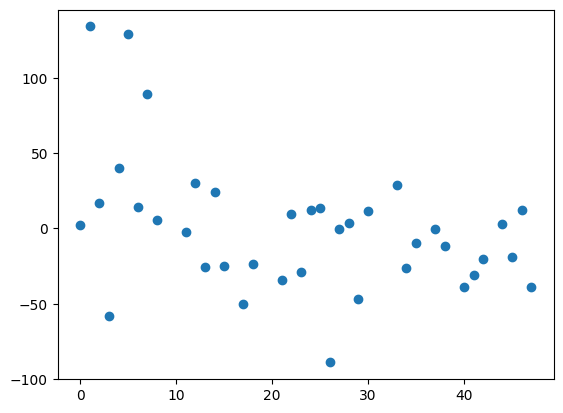

In [35]:
plt.scatter(residual.index, residual)

Исходя из диаграммы, имеется много больших остатков. Значит, качество модели на обучающей выборке является невысоким

Вычислим коэффицент детерминации 

In [36]:
r2_m1 = r2_score(y_train, prediction_train)
r2_m1

0.6319208378767698

Относительно низкая величина коэффицента детерминации подтверждает вывод о невысоком качестве модели на обучающей выборке

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [37]:
mape_m1 = mean_absolute_percentage_error(y_train, prediction_train)*100
mape_m1

88.6226764659184

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [38]:
mse_m1 = mean_squared_error(y_train, prediction_train)
mse_m1

1925.52201883362

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [39]:
mae_m1 = mean_absolute_error(y_train, prediction_train)
mae_m1

30.53385000490224

## Оценка качества модели на тестовой выборке

Выполним предсказание с помощью функции predict

In [40]:
prediction_test = m1.predict(X_test)
prediction_test

array([245.65649449,  75.59076608,  93.27871143,  87.84048033,
        80.44733526, 105.42690173, 130.6229422 , 130.35197485,
        19.53301246, 167.70148438])

Вычислим остатки

In [41]:
residual1 = (y_test - prediction_test)
residual1

16    -25.656494
19     44.409234
43    -51.278711
9      42.159520
39      2.552665
36    -20.426902
31    189.377058
20    -35.351975
10     -3.033012
32    132.298516
Name: Price, dtype: float64

Построим диаграмму остатков

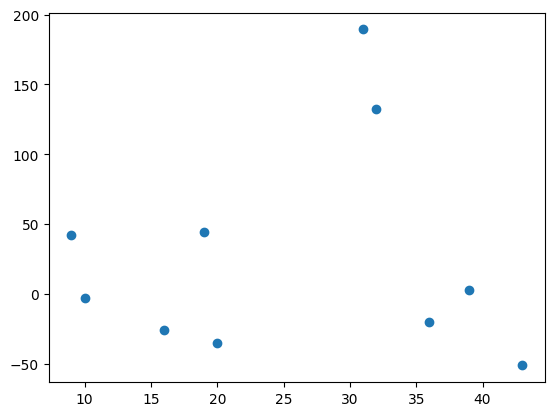

In [42]:
plt.scatter(residual1.index, residual1)

Исходя из диаграммы, имеется много больших остатков. Значит, качество модели на тестовой выборке является невысоким

Вычислим коэффицент детерминации

In [43]:
r2test_m1 = r2_score(y_test, prediction_test)
r2test_m1

0.3667341115206302

Низкая величина коэффицента детерминации подтверждает вывод о невысоком качестве модели на тестовой выборке

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [44]:
mapetest_m1 = mean_absolute_percentage_error(y_test, prediction_test)*100
mapetest_m1

38.9173791073389

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [45]:
msetest_m1 = mean_squared_error(y_test, prediction_test)
msetest_m1

6208.667006994158

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [46]:
maetest_m1 = mean_absolute_error(y_test, prediction_test)
maetest_m1

54.65440867094628

Выделим значения метрик на обучающей и тестовых выборках в отдельную таблицу

In [47]:
ind = ['R2', 'MAPE', 'MSE', 'MAE']
dat1 = [r2_m1, mape_m1, mse_m1, mae_m1]
dat2 = [r2test_m1, mapetest_m1, msetest_m1, maetest_m1]

pd.DataFrame({
    'Metrics': ind,
    'Train': dat1,
    'Test': dat2
})

,Metrics,Train,Test
0,R2,0.631921,0.366734
1,MAPE,88.622676,38.917379
2,MSE,1925.522019,6208.667007
3,MAE,30.533850,54.654409


Исходя из этих данных нельзя сказать получилась модель переобученной или недообученной

# Улучшение качества модели

## Очистка данных

Построим диаграмму boxplot для признаков

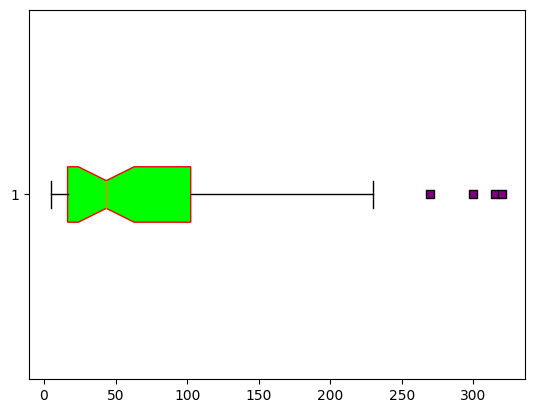

In [48]:
box = plt.boxplot(df.Price, vert = False, notch = True, patch_artist = True,
                  flierprops = dict(markerfacecolor = 'purple', marker = 's'),
                  boxprops = dict(color = 'red', facecolor = 'lime' ))

Удалим аномальные данные

In [49]:
df.query('Price > 250')

,Price,House,Area,Dist,Eco
1,270.0,350,15.0,15.0,1
5,315.0,450,25.0,25.0,1
31,320.0,300,15.0,0.5,1
32,300.0,400,22.0,20.0,1


In [50]:
df2 = df.drop(index = [1, 5, 7, 16, 31, 32])

In [83]:
df2.shape

(42, 5)

## Обучение модели

Выделим отдельно целевую переменную и исходные признаки

In [52]:
X2 = df2.drop(['Price'], axis=1)
y2 = df2['Price']

Обучаем модель на наших данных

In [53]:
m2 = linear_regressor.fit(X2, y2)

Выполним предсказание с помощью функции predict

In [54]:
prediction2 = m2.predict(X2)
prediction2

array([ 39.25646568,   3.55007832, 137.0173102 ,  77.73105718,
        -1.0392722 ,  11.01623118,  76.46267812,  25.36640982,
        11.01623118,  66.11458223,  33.75889885,  -0.16121534,
        53.84561573,  99.58226329,  51.00822906,  64.11795738,
        84.07295245, 118.43095028,  16.4940883 ,  45.95780069,
        27.45393712,  18.3690179 , 121.47595277,  38.8871404 ,
        28.33535683,  53.22109008,  18.65823527,  38.88992234,
        25.57545384,  50.83515837,  86.11825154,  81.40401735,
        41.06428699,  68.54117559,  96.97474952,  44.94406563,
        34.10846711,  53.56408286,   9.86021042,  42.53278474,
        -1.32606913,  73.41340005])

Вычислим остатки

In [55]:
residual2 = (y2 - prediction2)
residual2

0    -12.256466
2      2.449922
3    -17.017310
4     57.268943
6     11.039272
8      3.983769
9     53.537322
10    -8.866410
11    -4.016231
12    43.885418
13   -20.758899
14    17.161215
15   -23.845616
17    -4.582263
18    -6.008229
19    55.882043
20    10.927048
21     1.569050
22     0.005912
23   -20.957801
24    -7.453937
25     1.630982
26   -21.475953
27   -13.887140
28    21.664643
29   -44.721090
30    -2.158235
33    21.110078
34   -11.575454
35   -12.835158
36    -1.118252
37     3.595983
38   -13.064287
39    14.458824
40   -16.974750
41   -29.944066
42    -7.108467
43   -11.564083
44    -4.360210
45     4.467215
46     6.326069
47   -14.413400
Name: Price, dtype: float64

Вычислим коэффицент детерминации

In [56]:
r2_m2 = r2_score(y2, prediction2)
r2_m2

0.7134821654307871

Величина коэффицента детерминации близка к 0.8.

## Очистка данных 2

Удалим данные с большим остатком

In [57]:
df3 = df2.drop(index = [4, 9, 19])

In [58]:
df3.shape

(39, 5)

Выделим отдельно целевую переменную и исходные признаки

In [59]:
X3 = df3.drop(['Price'], axis=1)
y3 = df3['Price']

Обучаем модель на наших данных

In [60]:
m3 = linear_regressor.fit(X3, y3)

Выполним предсказание с помощью функции predict

In [61]:
prediction3 = m3.predict(X3)
prediction3

array([ 34.60790179,   3.77356588, 122.42130188,   2.85159397,
        13.640386  ,  24.89016397,  13.640386  ,  54.1939202 ,
        23.94737877,   2.64105775,  40.37800693, 102.13374249,
        52.95528912,  78.10281354, 104.99080566,  16.33739002,
        35.26853058,  23.02049754,  17.18686496, 115.81149334,
        34.5986214 ,  22.78097636,  40.06541249,  17.0196824 ,
        35.97602925,  19.47553032,  36.63927099,  83.75246089,
        75.66817324,  28.62976345,  66.69324628,  82.97652545,
        32.69339642,  37.44046853,  50.12487364,  11.08385519,
        47.27321537,   1.78687441,  74.02853354])

Вычислим остатки

In [62]:
residual3 = (y3 - prediction3)
residual3

0     -7.607902
2      2.226434
3     -2.421302
6      7.148406
8      1.359614
10    -8.390164
11    -6.640386
12    55.806080
13   -10.947379
14    14.358942
15   -10.378007
17    -7.133742
18    -7.955289
20    16.897186
21    15.009194
22     0.162610
23   -10.268531
24    -3.020498
25     2.813135
26   -15.811493
27    -9.598621
28    27.219024
29   -31.565412
30    -0.519682
33    24.023971
34    -5.475530
35     1.360729
36     1.247539
37     9.331827
38    -0.629763
39    16.306754
40    -2.976525
41   -17.693396
42   -10.440469
43    -8.124874
44    -5.583855
45    -0.273215
46     3.213126
47   -15.028534
Name: Price, dtype: float64

Вычислим коэффицент детерминации 

In [63]:
r2_m3 = r2_score(y3, prediction3)
r2_m3

0.8285396573186532

Величина коэффицента детерминации больше 0.8, будем считать качество модели достаточно хорошим

## Оценка качества модели на обучающей выборке

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=test_size, random_state=r_state)

Обучаем модель на наших данных

In [65]:
m3 = linear_regressor.fit(X_train, y_train)

Посомтрим на результат обучения. Оценки коэффициентов перед признаками

In [66]:
m3.coef_

array([ 0.08804488,  2.65983201, -0.44979674, 11.95195214])

Оценка свободного коэффициента

In [67]:
m3.intercept_

14.148426600499768

Построим диаграмму остатков

Выполним предсказание с помощью функции predict

In [68]:
prediction_train = m3.predict(X_train)
prediction_train

array([115.6762095 ,  23.27046387,   2.00736864,  67.178446  ,
        49.77635586,  77.2883534 ,  56.42140985,  78.33361103,
        52.33804005,  36.15569212,  35.17766443, 107.353876  ,
        17.79060451,  45.85373865,  13.11629715,  13.11629715,
        84.27450973,  37.25245217, 125.03415813,   4.0402462 ,
        39.68594664,  36.53112941,  36.97870687, 101.00369596,
        25.73267535,  24.58541732,  73.67742549,   1.18567202,
        25.24166445,  42.78517717,  16.63669487])

In [69]:
residual3_train = (y_train - prediction_train)
residual3_train

26   -15.676209
28    26.729536
6      7.992631
39    15.821554
43    -7.776356
37     7.711647
12    53.578590
20    16.666389
18    -7.338040
0     -9.155692
41   -20.177664
21    12.646124
25     2.209395
45     1.146261
8      1.883703
11    -6.116297
36     0.725490
23   -12.252452
3     -5.034158
2      1.959754
35    -1.685947
42    -9.531129
33    23.021293
17    -6.003696
13   -12.732675
24    -4.585417
47   -14.677425
46     3.814328
10    -8.741664
29   -34.285177
22    -0.136695
Name: Price, dtype: float64

Вычислим остатки

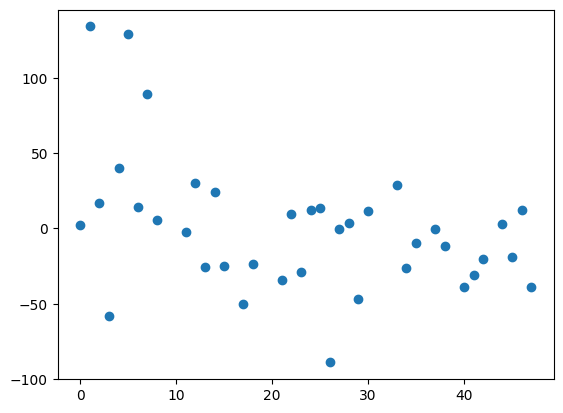

In [70]:
plt.scatter(residual.index, residual)

Исходя из диаграммы видно, что остатки достаточно небольшие. Значит, качество модели на обучающей выборке является высоким

Вычислим коэффицент детерминации с помощью функции 

In [71]:
r2_m3 = r2_score(y_train, prediction_train)
r2_m3

0.8158834914611284

Величина коэффицента детерминации больше 0.8, будем считать качество модели достаточно хорошим

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [72]:
mape_m3 = mean_absolute_percentage_error(y_train, prediction_train)*100
mape_m3

45.83869215990569

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [73]:
mse_m3 = mean_squared_error(y_train, prediction_train)
mse_m3

251.58879070501104

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [74]:
mae_m3 = mean_absolute_error(y_train, prediction_train)
mae_m3

11.348819100903167

## Оценка качества модели на тестовой выборке

Выполним предсказание с помощью функции predict

In [75]:
prediction3_test = m3.predict(X_test)
prediction3_test

array([43.17770666, 85.6610763 , 17.77014169, 20.15951698, 36.04710102,
       31.18832935, 11.00330344,  2.12487301])

Вычислим остатки

In [76]:
residual3_test = (y_test - prediction3_test)
residual3_test

15   -13.177707
40    -5.661076
30    -1.270142
34    -6.159517
27   -11.047101
38    -3.188329
44    -5.503303
14    14.875127
Name: Price, dtype: float64

Построим диаграмму остатков

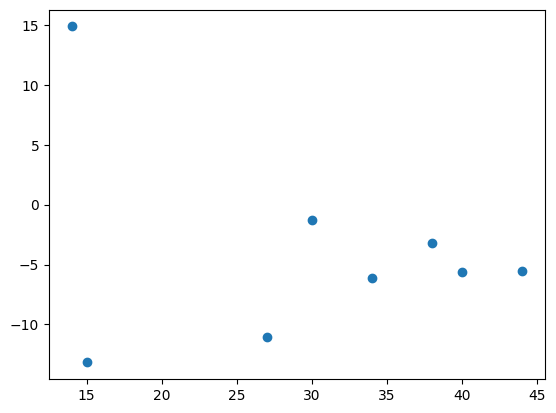

In [77]:
plt.scatter(residual3_test.index, residual3_test)

Исходя из диаграммы, имеется малое количество больших остатков. Значит, качество модели на тестовой выборке является высоким

Вычислим коэффицент детерминации с помощью функции 

In [78]:
r2test_m3 = r2_score(y_test, prediction3_test)
r2test_m3

0.8283497655984086

Величина коэффицента детерминации больше 0.8, будем считать качество модели достаточно хорошим

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [79]:
mapetest_m3 = mean_absolute_percentage_error(y_test, prediction3_test)*100
mapetest_m3

43.22906458469656

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [80]:
msetest_m3 = mean_squared_error(y_test, prediction3_test)
msetest_m3

78.62653549557899

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [81]:
maetest_m3 = mean_absolute_error(y_test, prediction3_test)
maetest_m3

7.610287805087827

In [82]:
ind = ['R2', 'MAPE', 'MSE', 'MAE']
m3_metrics = [r2_m3, mape_m3, mse_m3, mae_m3]
m3_test_metrics = [r2test_m3, mapetest_m3, msetest_m3, maetest_m3]

pd.DataFrame({
    'Metrics': ind,
    'Train': m3_metrics,
    'Test': m3_test_metrics
})

,Metrics,Train,Test
0,R2,0.815883,0.828350
1,MAPE,45.838692,43.229065
2,MSE,251.588791,78.626535
3,MAE,11.348819,7.610288


Исследуемая модель обладает более высоким качеством на тестовой выборке, нежели на обучающей выборке, то есть модель недообучена

# Заключение

Цель работы — предсказание стоимости коттеджа по его площади и другим характеристик с помощью линейной модели регрессионного анализа.

Использованные пакеты: numpy, pandas, matplotlib, seaborn, sklearn.

В работе мы разделили данные на обучающую и тестовые выборки, построили модель линейной регрессии и оценили ее качество с помощью различных метрик. Затем мы провели анализ выборки и удалили из нее аномальные данные с целью улучшения качества модели. Выбросив данные с большими остатками, мы получили коэффицент детерминации равный 0.8285396573186532. В итоге модель получилась недообученной.